**SENTIMENT ANALYSIS ON AMAZON ELECTRONIC PRODUCTS**

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

C:\Users\andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Specify the path to your CSV file
csv_file_path = "Amazon Reviews 1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

C:\Users\andre\AppData\Local\Temp\ipykernel_12508\3612977657.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [3]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
print( f'Shape of the dataset: ', df.shape )

Shape of the dataset:  (34660, 21)


In [5]:
#Now, let's see what are the columns in our database:

print ( f'Number of features in our dataset: ', len( df.columns ) )
print( '\n' )

for column in df.columns:
    print( column )

Number of features in our dataset:  21


id
name
asins
brand
categories
keys
manufacturer
reviews.date
reviews.dateAdded
reviews.dateSeen
reviews.didPurchase
reviews.doRecommend
reviews.id
reviews.numHelpful
reviews.rating
reviews.sourceURLs
reviews.text
reviews.title
reviews.userCity
reviews.userProvince
reviews.username


!Here we are planning on describing each feature like in the Titanic lab, but we are waiting for the Kaggle link in case there is already a description which would make it easier!

In [6]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [7]:
amazon_categorical = []
amazon_numerical = []

for column in df.columns:
    if df[column].dtype == 'object':
        amazon_categorical.append(column )
    else:
        amazon_numerical.append(column )  
        
print( f'Number of categorical features: ', len(amazon_categorical) )
print ( '\n' )
        
print ( amazon_categorical )

Number of categorical features:  16


['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username']


In [8]:
print( f'Number of numerical features: ', len(amazon_numerical) )
print ( '\n' )

print ( amazon_numerical )

Number of numerical features:  5


['reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.userCity', 'reviews.userProvince']


Now, we want to look for features which contain $blank$ , $NULL$ or $empty$ values.

In [9]:
amazon_features_blank = []

for features in df.isnull():
    if df[features].isnull().sum() > 0:
        amazon_features_blank.append(features)
        print( features, '\n', df[features].isnull().sum() )
        
print( '\n' )        
print( f'Number of features that contain blank, null or empty values is: ', len(amazon_features_blank) )
print( '\n' )
print ( amazon_features_blank )

name 
 6760
asins 
 2
reviews.date 
 39
reviews.dateAdded 
 10621
reviews.didPurchase 
 34659
reviews.doRecommend 
 594
reviews.id 
 34659
reviews.numHelpful 
 529
reviews.rating 
 33
reviews.text 
 1
reviews.title 
 5
reviews.userCity 
 34660
reviews.userProvince 
 34660
reviews.username 
 2


Number of features that contain blank, null or empty values is:  14


['name', 'asins', 'reviews.date', 'reviews.dateAdded', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username']


Let's drop the completely(or almost) empty columns:

In [10]:
df = df.drop( columns = [ 'reviews.id', 'reviews.didPurchase', 'reviews.userCity', 'reviews.userProvince' ] )

In [11]:
#Here, we replace the null values in the reviews and they titles by empty string

df['reviews.text'].fillna('', inplace = True)
df['reviews.title'].fillna('', inplace = True)

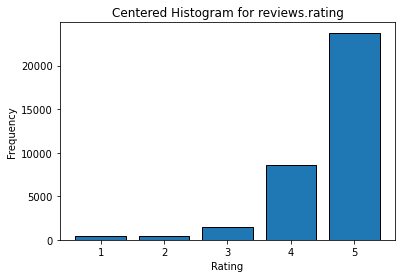

In [12]:
'''plt.hist( df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Histogram for reviews.rating' )
plt.show()'''
data = df['reviews.rating']

num_bins = 5  
bin_width = 1

bin_boundaries = np.arange(min(data) - bin_width/2, max(data) + bin_width/2 + 1, bin_width)
bin_centers = bin_boundaries[:-1] + bin_width / 2

plt.hist(data, bins=bin_boundaries, edgecolor='black', rwidth = 0.8)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Centered Histogram for reviews.rating')

plt.show()

In [13]:
product_counts = df[ 'asins' ].value_counts()

product_counts

B018Y229OU               10966
B00L9EPT8O,B01E6AO69U     6619
B00U3FPN4U                5056
B00OQVZDJM                3176
B01AHB9CN2                2814
B018Y23MNM                1685
B018Y225IA                1038
B01BH83OOM                 636
B00IOY8XWQ                 580
B01J2G4VBG                 402
B00TSUGXKE                 372
B018SZT3BK                 270
B0189XYY0Q                 256
B00ZV9PXP2                 212
B01AHB9CYG                 158
B00QFQRELG                  73
B00VINDBJK                  67
B00IOYAM4I                  51
B01BFIBRIE                  30
B00QJDU3KY                  19
B002Y27P3M                  19
B01J4ORNHU                  16
B00QL1ZN3G                  15
B01AHB9C1E                  14
B006GWO5WK                  13
B00LW9XOJM                  13
B002Y27P6Y                  10
B018Y22BI4                  10
B006GWO5NE                   8
B00UH4D8G2                   8
B00X4WHP5E                   7
B018T075DC                   7
B018Y22C

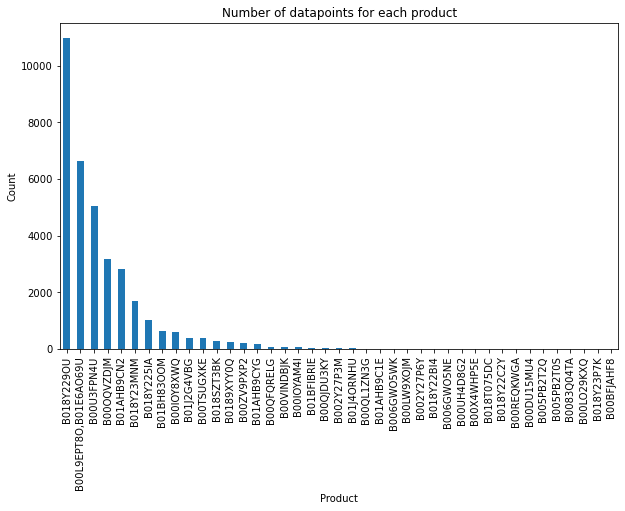

In [14]:
plt.figure( figsize = (10, 6) )
product_counts.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Number of datapoints for each product') 
plt.show()

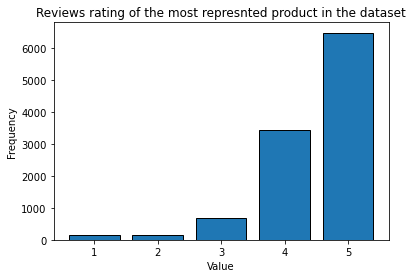

In [15]:
'''filtered_df = df[ df['asins'] == 'B018Y229OU' ]

plt.hist( filtered_df['reviews.rating'])
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )
plt.show()'''
filtered_df = df[ df['asins'] == 'B018Y229OU' ]

num_bins = 5  
bin_width = 1

bin_boundaries = np.arange(min(filtered_df['reviews.rating']) - bin_width/2, max(filtered_df['reviews.rating']) + bin_width/2 + 1, bin_width)
bin_centers = bin_boundaries[:-1] + bin_width / 2

plt.hist( filtered_df['reviews.rating'], bins=bin_boundaries, edgecolor='black', rwidth = 0.8)
plt.xlabel( 'Value' )
plt.ylabel( 'Frequency')
plt.title ( 'Reviews rating of the most represnted product in the dataset' )

plt.show()

In [16]:
overall_grade = filtered_df['reviews.rating'].mean()
print( overall_grade )

4.454222141163597



**CLEANING THE DATASET: REMOVING PUNCTUATION FROM REVIEWS**


In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.text'] = df['reviews.text'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.text'][0])

This product so far has not disappointed My children love to use it and I like the ability to monitor control what content they see with ease


In [19]:
translator = str.maketrans('', '', string.punctuation)

df['reviews.title'] = df['reviews.title'].apply(lambda x: str(x).translate(translator) if pd.notnull(x) else x )
    
print( df['reviews.title'][2])

Beginner tablet for our 9 year old son


In [20]:
df['length_review'] = df['reviews.text'].apply(len)

for i in df['length_review']:
    print(i)

141
74
125
584
606
206
110
129
260
54
51
83
139
61
51
77
59
159
61
307
109
160
81
219
166
90
84
163
49
96
48
92
63
143
60
100
61
70
53
57
403
72
68
121
55
111
128
65
51
132
123
102
410
54
106
88
67
423
54
57
230
86
83
73
111
98
76
143
86
49
85
82
65
67
86
212
79
168
57
63
88
104
387
474
74
310
84
327
403
935
87
55
773
47
53
143
55
300
130
125
146
75
75
242
46
74
66
52
57
64
82
484
160
121
291
228
144
97
76
70
46
168
82
72
95
176
1030
65
215
59
528
70
131
129
61
333
63
45
322
249
66
142
56
126
110
86
88
87
143
156
207
304
117
770
126
307
147
84
61
132
125
108
94
105
51
64
102
91
240
120
81
51
83
51
67
631
220
105
104
96
82
114
227
72
67
60
70
56
61
82
489
428
264
202
239
72
51
55
94
224
161
73
82
120
83
55
259
127
118
99
71
123
109
53
71
51
82
227
53
77
47
963
176
94
443
95
213
69
55
62
214
54
96
75
122
107
73
97
119
101
63
49
190
124
176
339
87
72
86
236
49
79
145
391
119
335
289
148
63
445
113
63
106
68
199
356
82
485
50
79
195
222
120
190
73
86
73
185
65
76
51
67
210
126
89
72
131
72

81
77
51
75
481
197
86
861
954
114
100
70
455
209
107
141
407
86
70
59
409
68
356
149
84
400
110
82
69
92
61
115
285
75
53
70
55
124
57
52
61
552
60
172
87
106
86
214
142
66
77
79
163
130
268
190
66
63
63
76
233
47
75
240
74
145
58
225
71
77
97
239
119
69
63
123
194
62
73
141
90
118
48
184
99
99
77
358
94
324
235
76
316
265
159
50
54
52
252
155
74
71
129
77
168
66
79
210
125
120
94
70
90
93
84
101
108
276
60
108
143
129
172
64
83
54
199
51
58
106
113
143
52
122
53
126
99
125
124
54
163
78
122
214
150
195
118
83
68
70
76
146
149
141
56
109
123
64
76
94
58
931
64
64
90
217
132
187
314
157
56
72
68
84
116
75
83
69
115
75
48
188
57
86
230
73
161
94
220
73
53
241
54
74
83
297
127
130
62
292
52
227
133
292
98
51
214
144
158
29
361
81
57
77
76
61
252
192
48
306
168
65
72
161
166
118
254
156
55
184
69
53
74
71
199
71
65
94
49
153
85
320
57
161
367
199
318
63
73
418
961
380
89
779
159
299
232
90
341
295
307
697
49
259
56
210
403
1411
310
174
282
267
52
129
51
106
876
239
228
825
87
836
53
508
1

62
92
69
51
53
112
56
47
101
138
82
52
63
235
110
61
148
61
59
76
345
162
111
254
85
85
143
440
372
54
82
88
74
58
61
42
61
117
70
49
161
360
121
72
56
80
127
66
98
320
50
363
148
341
78
49
59
82
19
221
505
50
57
423
57
79
130
218
241
72
300
66
249
83
116
96
219
107
67
897
58
121
116
89
59
324
100
182
284
66
92
58
77
95
220
51
1041
89
131
259
104
146
84
52
71
60
71
54
192
58
77
190
63
110
64
61
71
66
78
85
257
57
154
108
202
74
165
94
273
135
73
59
113
138
138
260
63
99
100
128
265
850
117
152
293
151
102
69
222
246
50
59
123
252
335
95
197
309
258
111
418
135
85
170
97
65
48
109
55
162
51
92
127
184
239
244
125
175
921
131
56
292
130
86
81
257
76
48
154
54
62
101
93
93
135
174
116
60
117
532
342
80
98
48
60
59
234
221
114
301
238
67
112
198
173
80
121
62
62
62
60
113
204
65
62
103
46
103
89
94
104
100
139
137
111
61
108
52
204
197
95
100
83
81
121
83
49
68
49
89
103
437
48
52
55
72
122
121
57
156
78
108
70
240
73
53
397
166
114
70
57
202
83
153
67
100
55
237
55
65
84
92
91
64
194
333


97
66
81
58
282
97
66
129
73
104
73
76
50
63
81
91
112
105
110
108
78
78
83
57
84
121
111
50
292
80
74
187
75
48
78
62
70
168
87
50
133
48
147
107
197
83
60
78
69
77
54
135
77
245
153
54
68
196
99
66
89
369
47
130
64
105
61
79
87
116
81
235
53
223
51
86
68
103
149
70
80
50
57
67
64
68
173
50
60
249
70
186
95
58
55
52
73
52
50
60
124
76
58
82
93
87
211
95
250
389
153
74
73
71
100
68
83
53
85
74
420
141
47
101
66
54
69
50
107
141
118
109
68
158
92
88
112
69
146
177
205
49
142
51
50
59
242
45
213
59
118
81
53
54
687
47
78
62
264
138
98
111
101
51
82
263
83
81
109
170
37
65
52
63
54
94
357
71
63
55
120
62
144
77
46
100
120
71
177
224
120
91
103
118
303
275
139
128
151
84
55
82
50
63
56
142
54
57
161
155
164
60
145
61
105
91
95
346
53
286
347
59
98
71
114
116
93
71
117
64
202
99
101
59
86
69
150
57
58
53
70
55
109
68
106
51
199
129
59
148
51
47
63
63
156
57
62
198
82
54
107
84
169
318
314
224
235
127
129
275
67
117
66
189
87
87
113
99
140
74
140
75
94
239
129
64
147
65
55
131
134
78
65
314


235
159
107
106
96
108
90
63
62
240
114
121
62
230
180
54
117
56
98
132
53
47
77
157
214
512
74
96
68
229
68
286
150
324
146
143
678
50
55
60
113
72
49
186
998
108
204
244
641
54
52
529
56
267
204
97
147
63
183
104
412
51
120
251
263
97
152
138
98
369
293
58
206
86
90
108
64
1344
76
98
77
190
52
71
75
262
72
214
80
81
97
54
155
108
206
130
49
75
225
155
134
74
97
108
53
106
135
204
993
176
281
100
148
86
85
64
116
52
107
78
48
133
64
148
89
211
160
828
47
104
181
83
125
325
98
439
126
65
190
57
206
96
72
86
93
443
172
84
193
121
113
82
73
91
116
106
233
115
498
473
232
46
196
310
48
388
82
86
100
332
50
143
88
263
82
84
54
49
467
119
58
91
87
91
125
151
93
163
117
54
59
116
75
206
206
50
85
73
84
53
277
58
279
59
206
185
325
46
170
149
254
124
131
238
66
48
148
48
194
115
63
60
163
53
133
98
66
125
55
323
99
111
401
133
284
121
114
64
55
274
115
131
50
60
89
248
60
286
48
107
141
68
51
158
285
105
156
78
127
124
130
164
126
63
117
195
62
129
90
131
308
125
472
91
143
87
56
92
74
287
25

90
223
103
151
91
199
195
208
51
247
85
1033
62
184
96
60
292
72
58
106
163
133
64
210
106
97
125
63
71
99
76
161
67
106
218
60
80
463
51
79
116
131
81
304
88
437
127
75
86
227
50
335
50
70
68
97
60
60
134
80
206
63
87
192
58
150
75
97
164
67
138
300
68
186
63
50
92
52
235
211
130
133
57
101
63
86
300
102
93
51
242
233
101
50
120
596
160
115
165
106
62
321
121
88
93
199
178
67
60
59
91
98
47
52
55
112
131
157
329
273
134
62
62
68
356
119
72
105
63
89
111
74
60
120
69
111
52
104
68
72
113
263
130
66
87
63
282
63
73
150
150
795
78
124
128
52
124
709
177
71
53
87
62
173
80
55
66
72
129
200
161
68
108
64
107
293
102
106
74
58
94
250
85
49
54
59
99
97
162
78
134
161
68
57
106
61
363
65
63
261
107
159
110
65
65
137
120
57
74
202
157
111
118
56
122
77
75
100
88
231
52
100
84
109
78
106
66
80
80
304
189
61
255
214
391
81
146
145
63
365
54
204
356
88
116
83
266
121
228
101
95
57
50
63
184
283
69
49
149
123
70
116
81
358
71
86
96
54
258
53
113
141
197
70
79
93
54
103
72
109
48
61
241
91
60
109
4

146
112
66
49
178
74
51
31
233
91
93
704
60
64
106
61
63
124
150
197
122
56
170
559
116
61
109
155
164
106
117
390
62
131
527
69
53
57
75
109
83
150
62
131
51
384
66
49
179
57
102
50
206
51
90
57
55
53
194
49
52
147
310
57
87
48
46
86
68
119
274
172
81
105
323
67
105
85
104
560
52
104
184
420
147
88
49
79
68
54
53
121
58
210
98
129
86
109
73
62
96
132
72
153
176
54
50
912
64
104
150
99
87
54
213
52
740
190
310
192
184
457
50
61
79
58
150
63
85
52
114
159
82
187
53
93
49
347
92
51
93
56
114
64
123
111
98
318
75
80
55
98
64
291
178
49
68
85
201
257
63
76
73
73
94
96
52
127
63
319
63
67
95
87
140
75
292
70
319
59
99
307
112
176
142
55
190
94
72
52
56
71
254
97
140
42
58
108
172
101
50
286
55
375
254
169
151
87
92
126
550
217
280
83
61
380
163
57
118
144
71
53
202
59
162
173
187
128
138
57
97
80
86
161
226
89
118
206
61
66
76
260
48
91
95
69
48
116
102
244
63
106
66
77
179
183
62
127
733
60
51
201
38
103
55
135
54
173
66
61
138
157
130
75
78
93
114
106
138
99
86
92
53
191
324
166
122
258
5

213
268
194
50
198
82
127
65
139
102
120
146
103
1081
111
73
62
62
143
334
133
192
456
65
302
100
267
232
172
82
100
228
91
465
105
98
65
69
118
99
313
79
140
159
168
116
68
210
804
53
89
321
125
88
465
121
55
225
66
378
155
82
119
55
509
72
75
358
171
198
84
87
366
126
416
90
159
272
145
76
85
219
77
48
420
468
60
78
122
188
297
112
54
57
99
61
72
176
88
168
81
150
220
201
130
116
706
123
50
283
81
51
148
81
100
287
87
264
52
69
274
112
62
270
105
146
123
67
309
118
53
93
48
119
57
159
151
143
77
141
136
105
251
194
208
48
402
244
168
114
400
48
56
283
116
49
888
63
589
325
185
356
120
98
214
207
281
88
101
75
68
204
86
79
152
196
156
49
230
73
59
74
213
430
65
98
73
134
334
107
181
94
95
60
188
130
91
185
61
330
101
80
372
70
50
1050
55
50
93
74
228
98
135
106
133
115
753
217
98
48
131
73
122
364
84
106
101
236
68
45
113
776
64
280
87
104
69
68
85
53
115
179
57
222
147
325
122
404
683
68
113
154
321
340
137
65
106
88
52
155
85
150
423
155
150
107
184
574
64
360
64
116
82
134
103
103


59
111
194
71
249
71
288
111
236
67
63
59
162
231
1097
83
234
72
69
161
586
116
99
327
193
147
124
88
81
208
247
50
89
143
554
146
320
50
62
177
280
69
67
297
60
234
51
350
171
482
56
167
111
174
397
50
232
53
211
387
108
77
210
88
139
48
172
77
173
1371
48
114
60
70
244
231
268
223
94
108
97
75
209
95
205
331
309
64
142
48
105
74
129
61
50
79
147
204
91
100
774
95
80
99
163
49
51
102
239
70
134
182
49
129
67
157
162
50
54
168
271
146
57
121
191
137
157
156
68
526
208
398
159
67
108
180
652
350
141
143
63
123
1625
1596
1527
1030
1382
176
1633
1854
458
454
941
601
215
10193
830
156
113
152
455
270
699
204
132
299
94
77
188
108
53
105
391
141
125
85
396
94
96
56
140
52
133
107
191
762
248
661
401
129
410
1510
165
67
249
439
1512
127
369
903
888
122
219
211
126
242
123
97
413
340
111
362
447
120
135
279
270
213
86
72
75
188
96
533
363
235
151
123
54
139
67
153
146
896
95
48
115
75
109
76
52
57
135
143
238
372
103
283
54
52
316
92
373
404
84
87
206
215
55
77
96
59
105
117
88
79
172
67
52
1

59
66
347
51
85
109
112
79
53
106
53
1222
98
93
264
105
57
64
406
84
72
131
206
146
264
261
283
111
55
157
235
404
123
135
44
67
240
201
125
217
94
72
56
243
102
54
70
158
273
141
197
465
91
52
53
102
168
191
158
229
228
68
191
83
126
187
114
111
210
104
365
94
153
57
58
308
202
297
322
80
286
91
59
116
63
287
106
80
79
51
70
50
150
57
285
229
47
161
261
66
230
83
170
200
56
124
116
66
152
50
84
367
94
87
210
132
112
73
191
63
101
64
128
67
72
55
129
80
74
67
112
96
116
95
58
242
183
69
60
85
67
253
117
198
88
179
95
242
69
69
109
105
51
73
237
154
134
411
63
83
175
78
99
334
247
90
125
443
162
193
105
166
67
104
170
64
58
95
78
69
237
423
246
187
115
288
65
101
615
61
188
73
67
83
214
147
143
89
126
71
80
120
54
120
177
70
86
269
111
84
313
54
175
76
93
50
80
157
76
387
80
79
107
76
49
53
72
138
49
69
97
143
57
81
153
86
113
150
406
327
182
83
185
282
74
187
65
111
209
50
95
132
77
99
300
153
59
219
328
134
222
296
316
155
63
50
86
49
288
310
90
80
64
63
55
77
74
130
83
76
80
290
74
1

135
138
221
445
113
160
52
53
227
74
82
239
252
87
72
172
99
114
195
139
59
187
1186
68
161
202
282
154
282
57
107
357
66
127
50
115
105
1966
71
225
123
47
85
161
111
144
59
49
81
252
215
172
91
137
135
90
81
374
49
92
70
244
90
158
333
129
61
125
205
132
49
202
79
192
602
134
201
50
152
263
236
120
199
83
84
78
80
58
120
96
224
71
49
120
124
119
181
91
365
207
92
103
95
54
145
58
122
50
307
86
423
1977
63
79
147
56
361
279
70
84
59
133
99
140
65
63
262
146
150
57
59
66
106
93
113
201
102
73
70
52
62
57
102
267
96
109
99
304
89
66
464
259
72
103
62
62
109
95
65
63
146
78
86
110
50
61
116
136
106
166
95
235
187
64
98
60
1157
49
143
112
84
52
140
51
58
56
270
85
57
70
275
159
305
96
55
386
203
323
68
93
60
128
80
65
1045
82
171
152
229
212
154
111
343
54
46
91
66
68
162
202
98
58
135
290
443
103
83
538
97
137
471
49
78
52
203
180
75
54
50
65
237
210
202
66
110
310
58
57
81
53
167
70
81
64
70
323
76
78
77
52
54
151
327
189
213
168
91
601
1248
120
2050
90
232
705
197
150
135
152
902
280
52

73
565
51
59
914
182
146
125
124
75
51
110
314
357
95
112
55
98
100
126
63
90
138
88
247
157
125
312
619
147
458
438
438
225
241
48
251
68
210
63
398
64
342
109
270
172
143
178
64
116
364
64
105
49
200
1561
73
61
69
108
91
251
240
205
210
77
48
112
52
78
72
248
135
181
400
57
75
143
70
54
143
91
82
80
159
71
53
59
363
242
556
83
61
195
429
346
84
76
147
56
198
73
250
160
169
52
174
199
178
47
219
106
93
81
58
135
528
785
60
259
278
281
261
124
326
77
728
301
225
211
157
92
159
135
547
200
104
112
71
585
375
243
55
258
118
75
78
172
158
291
99
52
117
297
183
47
116
202
78
72
509
158
108
410
52
46
194
120
82
91
391
62
128
564
102
451
1131
86
475
301
68
53
93
2405
62
185
56
263
269
97
436
184
181
255
691
82
44
16
9
960
1611
1609
1716
711
100
340
381
61
281
148
194
283
532
237
922
1979
139
260
209
314
47
490
164
307
96
62
108
94
177
154
298
396
173
167
309
721
647
300
49
524
617
162
117
185
551
21
104
59
176
153
193
68
172
146
101
57
278
84
75
136
182
78
207
61
55
112
78
69
58
383
200
67
5

48
199
58
61
65
432
80
77
127
201
220
59
69
66
48
51
188
52
112
53
69
114
59
117
386
125
47
110
69
114
56
215
87
43
13
49
193
95
68
73
228
141
69
55
55
230
55
249
95
60
168
190
47
78
97
61
84
77
156
48
104
96
58
50
71
53
580
201
128
80
71
517
181
46
51
161
198
51
67
102
87
133
290
221
66
69
54
502
83
167
112
69
59
76
49
103
108
83
141
322
82
225
73
155
61
507
189
59
95
54
78
97
74
308
125
523
57
355
67
162
162
50
116
50
51
162
204
58
84
85
397
74
216
139
98
84
479
62
74
52
49
78
135
51
97
64
184
332
427
225
136
75
66
299
56
64
84
83
188
61
70
121
48
51
79
78
129
52
393
73
59
424
88
60
435
93
99
79
838
345
111
105
190
96
55
218
93
65
97
175
109
76
191
68
78
94
49
50
148
97
67
140
48
93
130
458
95
58
94
79
121
110
91
106
100
295
61
51
130
51
234
73
154
54
56
59
57
104
108
206
76
111
49
83
55
71
265
56
176
62
171
157
70
48
86
335
168
96
74
124
70
273
57
606
72
62
55
109
58
83
95
51
122
94
145
95
165
100
64
54
55
354
115
60
172
59
63
130
71
136
141
51
134
65
56
299
67
55
63
110
78
52
99
17

112
61
148
61
516
60
228
103
84
115
102
51
209
168
49
288
61
93
347
62
51
98
315
170
49
83
60
53
75
103
61
60
92
177
63
159
56
94
58
75
964
159
354
67
94
68
105
63
49
70
54
129
187
238
64
90
119
45
145
49
199
80
155
48
62
101
338
405
121
353
71
160
117
112
77
820
188
167
47
68
256
286
87
48
91
113
93
55
318
75
79
86
42
116
77
59
242
190
79
187
73
123
121
204
80
50
111
384
110
46
126
62
1398
58
67
167
105
448
50
46
401
110
179
117
104
50
90
49
55
75
56
188
85
62
107
159
132
57
65
93
54
51
67
92
68
158
66
93
47
68
183
60
184
82
86
88
94
147
210
73
59
65
165
119
53
47
160
115
180
230
50
133
173
95
167
53
180
903
61
69
56
89
70
535
66
56
161
121
77
57
143
67
56
62
128
97
102
131
108
75
106
232
91
139
52
160
50
77
129
109
205
53
53
408
201
84
97
69
123
68
182
151
141
49
134
66
51
52
78
103
50
283
188
61
51
149
99
121
78
46
249
357
150
1006
73
78
61
91
63
211
163
197
95
83
56
76
89
126
156
50
65
142
154
314
214
183
65
292
149
234
47
157
96
88
110
55
104
260
63
163
137
310
125
82
222
144
195


In [21]:
df['length_title'] = df['reviews.title'].apply(len)

for i in df['length_title']:
     print(i)

6
9
38
4
25
21
20
15
17
28
25
17
11
9
9
22
4
25
20
13
16
18
10
21
34
30
20
43
9
12
43
24
13
22
12
31
13
14
12
5
31
9
19
31
15
25
26
14
11
7
34
26
36
13
16
5
12
31
37
19
35
31
12
23
13
10
17
11
11
18
27
9
12
11
12
18
26
9
23
15
21
43
29
25
14
17
10
7
38
19
22
11
21
7
14
26
13
35
21
11
10
7
10
7
11
16
48
7
50
17
9
16
13
29
26
24
28
12
26
26
15
14
9
18
17
29
17
29
31
17
21
34
16
46
13
18
9
24
49
23
18
24
24
21
7
14
23
5
22
34
18
25
20
43
48
27
12
11
24
7
16
26
1
18
9
4
15
33
29
18
4
6
19
11
18
22
25
26
19
7
24
9
29
10
34
26
6
17
14
19
36
25
27
19
10
13
11
8
15
27
12
28
13
10
44
7
38
12
18
19
21
25
32
20
19
15
11
44
17
12
8
30
14
12
41
14
33
32
11
11
9
12
27
16
28
16
12
32
22
9
12
13
22
7
19
30
21
19
19
19
4
18
15
33
9
26
30
18
18
23
20
22
21
11
12
13
12
17
13
9
29
32
12
26
23
9
12
10
7
12
16
10
13
7
11
2
32
14
9
30
14
5
21
24
20
7
11
30
16
13
26
4
19
11
21
23
12
27
19
35
14
5
19
18
10
10
12
18
12
11
7
24
23
23
18
7
22
18
4
45
34
12
24
46
38
25
17
19
15
30
20
25
13
12
40
17
27
14
21
33
7
1

13
45
42
19
8
11
11
10
10
10
47
36
10
5
24
10
37
10
24
10
18
10
12
54
10
11
10
10
10
10
11
11
85
10
13
25
4
10
10
22
10
4
16
10
10
10
7
11
10
16
10
10
50
34
10
10
10
41
10
32
10
10
10
10
24
5
10
10
12
69
10
20
10
10
10
51
10
14
11
5
6
10
42
10
10
18
34
44
24
10
26
10
44
99
10
10
86
10
8
10
10
10
19
10
10
12
10
10
36
10
10
54
11
10
10
10
8
10
66
11
15
10
10
20
11
11
8
11
47
10
10
48
32
23
98
9
12
27
10
10
49
9
10
10
10
10
19
10
60
10
10
10
12
12
10
37
11
50
13
10
10
10
10
10
10
41
29
10
10
24
38
65
13
13
13
25
29
14
21
18
2
12
9
7
28
12
27
12
27
17
12
20
7
29
29
12
7
11
24
31
13
27
18
18
43
14
11
12
23
24
18
11
40
40
18
18
33
23
12
38
19
12
18
13
13
11
36
32
24
4
6
23
12
19
15
27
20
7
12
21
9
12
15
9
21
7
22
40
25
20
11
21
14
16
18
30
28
35
27
17
20
10
12
16
16
13
43
4
22
4
21
25
16
12
32
36
16
14
31
7
27
23
21
18
32
28
32
22
10
10
14
12
11
4
5
4
12
12
7
27
29
16
21
14
38
5
16
31
28
32
22
12
23
26
31
16
21
26
25
14
25
43
24
13
16
19
7
16
13
14
15
29
15
13
19
13
7
13
13
48
13
22
11
15
27

21
34
12
7
16
17
12
11
17
13
27
17
9
32
23
22
18
11
28
15
23
8
28
49
26
10
10
13
9
21
30
7
7
24
34
16
14
19
25
26
13
35
18
12
12
18
21
25
12
4
20
30
29
20
4
13
7
19
18
4
4
15
43
27
7
11
13
19
38
16
13
12
33
9
16
20
15
18
35
12
14
17
27
20
11
31
8
20
19
14
30
26
24
17
18
50
9
9
28
24
12
14
11
14
15
19
27
23
19
27
37
26
14
18
12
18
42
31
25
26
31
36
17
48
11
24
27
14
24
7
4
16
23
13
24
15
13
6
24
17
18
12
16
12
12
11
22
21
29
32
13
18
23
42
16
31
19
21
27
12
14
17
46
15
15
31
22
22
5
5
26
25
11
15
22
11
12
15
19
30
9
26
12
11
39
20
36
5
16
16
11
35
5
4
4
4
10
20
23
19
17
20
42
15
17
8
13
19
13
17
15
50
17
7
23
22
12
18
10
7
20
36
8
14
20
8
11
17
24
18
10
18
12
11
17
43
9
27
7
7
19
4
26
12
38
17
15
9
8
12
12
12
11
17
25
19
13
33
29
12
18
40
5
12
19
20
30
19
18
11
29
31
18
19
11
11
31
45
21
11
11
9
22
12
21
11
23
12
10
10
13
25
9
21
24
18
19
18
11
12
21
12
23
15
14
16
27
14
32
12
18
32
24
14
12
11
28
22
30
7
16
22
13
13
20
12
14
12
35
19
14
23
4
11
7
13
6
27
20
43
7
27
9
25
49
19
31
23
4
4

25
17
28
11
22
21
13
10
9
44
14
15
5
6
16
40
21
26
18
16
44
12
22
22
7
12
20
12
11
14
41
21
30
30
28
36
12
20
23
12
16
18
23
16
17
23
30
6
27
24
11
5
21
11
22
13
21
11
19
18
43
22
10
17
23
14
13
27
5
13
27
17
12
26
18
12
21
24
14
22
37
12
10
4
20
9
12
13
28
11
11
12
21
13
22
25
4
14
12
20
30
19
11
47
11
22
14
26
11
18
21
20
13
18
5
11
30
22
30
7
13
31
25
9
25
6
23
12
15
19
28
35
30
23
12
14
11
11
25
30
28
19
20
14
37
17
29
4
20
26
7
28
23
30
27
7
46
41
23
32
9
16
41
12
38
17
7
21
12
12
28
17
31
7
11
16
23
4
19
27
14
12
14
23
18
26
40
10
15
29
32
17
27
14
20
12
11
41
22
20
24
7
19
12
22
34
9
12
45
28
29
27
19
15
12
13
15
23
28
13
13
9
45
10
13
19
11
26
11
14
19
24
29
15
20
26
42
12
25
9
17
21
29
34
12
19
14
10
29
25
22
27
25
11
15
47
36
35
26
10
9
11
12
19
20
27
21
24
23
6
22
11
15
26
25
21
21
14
14
18
19
18
13
16
5
16
12
12
25
9
44
40
11
11
18
23
5
14
12
18
11
19
10
12
15
17
14
29
32
13
14
35
18
29
36
12
12
39
12
7
40
18
17
33
17
25
21
24
32
24
12
11
31
19
14
11
12
31
25
18
26
24
18
22

11
19
29
26
24
18
34
13
17
12
29
27
19
12
7
13
10
28
18
10
5
15
26
20
39
28
37
15
13
11
13
19
30
17
5
38
12
23
18
26
13
12
5
12
11
5
10
18
9
17
7
18
13
8
17
36
12
15
12
39
49
12
12
5
33
9
12
28
26
37
11
11
11
13
14
28
14
9
9
13
5
27
21
14
19
28
14
4
23
18
29
31
12
9
22
21
37
21
31
14
13
27
31
16
18
40
13
7
12
13
5
22
9
21
11
11
24
7
21
24
12
14
23
12
46
26
19
7
10
9
16
12
42
18
14
14
13
30
23
9
31
16
14
34
11
7
23
16
19
11
9
21
18
20
4
19
9
10
22
14
26
5
23
14
11
19
30
5
26
23
11
11
17
10
12
22
10
4
12
21
36
18
5
25
12
13
32
9
13
27
18
8
29
24
6
5
14
14
36
29
16
20
12
18
17
15
33
21
26
25
19
22
31
17
12
12
18
27
36
29
18
33
11
21
25
33
12
41
16
24
27
13
14
31
15
13
29
12
7
31
19
15
20
20
11
6
22
19
5
24
32
22
17
17
24
19
11
20
19
18
7
40
13
9
3
6
17
17
44
9
19
7
20
26
32
11
18
24
26
19
7
26
4
26
23
11
3
29
19
45
21
21
13
35
43
4
22
15
21
44
17
5
18
8
12
24
11
26
11
9
22
11
8
21
11
40
17
23
12
4
25
13
16
15
25
41
19
35
30
25
33
20
17
7
11
17
8
39
23
28
30
26
11
25
13
9
12
10
12
9
18
19


14
12
21
8
14
27
14
29
20
9
14
16
12
9
23
13
27
21
15
11
17
13
13
7
11
8
12
19
9
43
23
9
5
20
36
27
7
9
5
9
14
14
9
21
40
18
14
24
38
12
28
19
8
16
12
12
14
30
14
18
12
15
14
19
19
22
21
23
5
20
20
17
32
35
6
44
17
41
13
45
14
15
19
17
14
4
12
12
35
37
21
13
26
12
29
12
28
28
2
17
12
14
24
49
24
14
15
12
39
13
12
28
9
24
26
21
9
8
12
22
25
22
9
21
7
7
19
29
21
17
23
16
19
21
19
14
7
14
12
17
5
21
14
19
5
14
22
14
4
10
14
24
17
29
20
21
22
16
9
6
4
14
18
16
11
14
6
13
13
34
16
20
27
25
7
25
11
5
14
14
7
43
11
15
18
5
7
7
13
21
21
24
20
13
18
14
23
35
13
12
13
5
9
20
14
29
19
16
9
19
26
7
26
26
27
28
18
15
27
18
21
21
18
21
14
27
14
16
18
15
8
14
22
18
21
30
14
13
5
11
14
25
24
4
21
14
24
12
7
14
28
7
11
48
12
9
44
26
13
5
12
6
20
32
24
32
25
19
19
14
13
25
22
20
23
21
16
14
9
14
12
19
33
15
13
14
32
14
19
5
29
25
11
16
20
11
17
31
22
14
15
12
11
29
43
13
17
7
31
21
28
28
39
15
22
34
9
21
21
13
27
12
21
37
7
25
15
13
27
13
22
16
14
17
20
27
13
14
18
21
17
21
12
14
26
23
17
27
14
12
25
9


20
10
13
13
30
17
22
17
18
41
20
17
32
7
7
8
34
12
30
6
12
6
33
39
12
19
45
30
12
35
46
15
33
24
32
24
40
11
12
33
13
7
25
13
7
7
26
12
34
18
16
17
20
15
12
17
16
26
17
2
18
21
13
32
7
43
17
17
24
7
29
7
5
13
23
30
4
15
13
15
32
5
17
26
7
16
9
31
22
15
30
32
14
13
27
6
9
12
21
13
23
39
29
35
19
19
7
17
17
26
13
17
27
9
25
9
25
14
15
15
27
17
18
13
47
20
9
14
16
26
17
20
28
21
44
29
37
29
26
10
40
46
23
16
26
21
14
22
17
24
16
38
16
15
29
34
12
5
21
24
17
23
12
12
7
23
12
25
7
22
12
32
12
9
29
47
10
28
7
16
13
13
26
36
14
7
12
47
22
14
13
28
17
25
34
9
22
7
11
13
26
34
24
11
6
11
12
19
12
7
24
22
7
41
29
17
17
25
20
17
13
5
17
15
12
11
29
34
33
19
7
21
47
15
13
15
16
24
16
11
28
26
27
33
12
37
11
22
19
12
13
36
34
22
40
15
11
11
21
12
16
13
32
27
12
13
45
7
31
19
34
30
16
10
23
13
32
7
12
12
15
24
15
11
18
13
34
17
11
19
20
14
18
33
14
15
17
13
27
14
20
24
34
5
16
25
11
8
20
35
13
12
19
16
26
12
12
9
25
17
16
21
35
7
9
27
13
27
13
11
24
44
12
18
20
13
11
11
13
32
23
26
13
12
49
47
41
17

24
22
9
26
10
9
9
26
13
12
13
11
13
10
11
43
24
14
24
19
10
30
21
14
3
14
11
11
13
23
7
27
31
12
9
13
9
13
16
8
13
13
10
12
35
27
11
6
19
21
11
20
25
35
9
9
22
12
7
33
7
9
19
20
21
12
44
13
11
26
36
28
26
10
10
13
21
13
7
7
15
12
3
23
13
7
20
35
22
14
29
9
4
12
15
14
18
13
3
10
44
17
14
7
14
7
15
16
11
36
27
8
29
15
12
32
48
12
13
11
14
7
17
25
12
16
25
17
27
9
23
17
12
24
24
15
12
26
7
5
13
35
11
50
16
9
25
24
6
14
37
7
18
42
12
7
28
3
8
5
24
42
13
27
8
7
9
12
12
9
40
10
12
11
11
7
21
11
14
29
17
2
7
28
3
9
10
11
32
11
7
21
14
12
12
36
15
14
16
12
13
37
8
7
19
14
7
19
44
20
33
13
18
10
5
28
23
7
25
30
48
40
11
15
16
32
16
13
29
18
15
17
18
12
5
9
44
36
19
11
17
11
13
26
12
5
26
18
8
36
37
8
19
7
14
35
13
3
9
22
24
16
14
5
7
39
10
17
49
30
21
35
11
13
6
7
26
15
4
11
23
13
12
14
11
13
5
9
11
41
23
15
7
20
33
7
35
31
5
22
38
5
11
12
16
20
14
13
17
44
13
19
22
10
10
5
7
22
16
29
10
7
10
13
17
32
9
12
36
26
12
17
37
38
15
27
25
47
12
16
4
19
13
14
5
28
16
23
17
24
20
25
13
10
16
7
23
13
12

32
22
13
9
5
23
30
6
11
13
8
25
10
7
26
14
4
29
24
25
12
20
7
17
34
15
39
11
9
29
5
13
12
34
27
25
16
26
36
5
23
13
11
15
10
22
29
15
23
23
18
9
28
20
29
5
48
13
13
13
10
27
9
10
11
11
7
28
13
23
10
26
9
15
31
25
11
16
4
41
42
35
11
14
14
46
23
21
15
12
48
13
14
13
20
19
17
5
11
23
11
5
11
48
9
11
29
18
17
31
7
9
49
13
16
35
7
4
35
16
22
13
17
12
14
14
10
17
7
8
9
11
5
31
16
24
14
46
15
5
28
9
29
40
21
10
12
47
11
3
30
4
8
13
9
41
19
26
10
12
11
22
29
5
22
17
24
20
8
23
10
7
36
5
10
9
9
15
5
29
20
5
12
41
32
12
7
9
13
12
22
10
28
18
10
15
30
13
7
24
7
11
19
10
40
9
38
28
13
28
47
29
13
12
7
23
10
18
18
24
13
10
11
17
10
13
14
7
18
15
16
15
7
4
11
10
38
9
22
7
31
13
20
13
15
10
20
13
20
10
7
20
7
34
10
37
18
20
13
11
11
15
7
13
38
27
31
7
39
33
40
11
48
23
33
11
35
2
44
30
33
23
22
27
20
19
22
5
5
28
13
27
2
25
13
18
24
12
12
18
11
19
10
30
23
6
20
13
12
31
32
16
15
12
13
19
7
17
16
26
15
16
17
15
26
12
23
7
15
24
11
29
14
12
15
7
35
13
13
4
19
43
12
6
29
17
15
11
10
16
17
15
36
19
10
1

33
23
26
7
24
13
10
32
13
6
19
3
17
17
13
7
17
28
27
13
31
7
45
5
10
20
19
10
9
10
43
15
18
19
10
29
9
24
11
31
25
5
17
13
7
23
7
19
16
44
7
14
11
5
24
32
13
22
12
11
13
19
23
13
13
9
22
25
19
25
19
7
5
22
37
17
5
17
18
10
10
19
30
24
10
43
16
29
30
28
35
43
7
3
23
20
3
15
5
17
17
26
24
20
17
12
20
22
49
39
12
24
31
10
20
14
22
27
5
16
23
20
11
12
15
38
45
27
24
11
1
7
9
20
26
23
11
22
48
22
16
34
17
11
19
12
43
48
23
36
23
15
7
10
13
11
25
12
13
3
11
28
40
34
23
48
18
16
14
39
2
13
32
38
7
6
19
5
47
14
23
11
7
10
40
27
23
16
32
7
13
38
13
11
7
10
11
13
25
21
10
26
25
15
15
13
50
25
16
11
13
48
13
25
3
17
14
10
12
27
7
5
42
13
8
27
22
9
13
13
7
50
3
7
19
8
7
31
11
13
38
11
13
44
13
31
15
15
11
10
24
20
7
12
27
17
12
12
28
34
30
20
19
17
17
10
24
30
29
11
31
22
16
15
22
31
17
9
25
10
22
33
13
28
22
16
7
43
18
20
12
13
15
7
37
32
21
13
13
22
10
26
10
31
13
9
6
18
15
28
17
13
46
4
26
32
28
22
28
35
26
37
10
11
36
12
32
17
12
24
22
9
7
10
43
12
46
4
23
31
12
8
11
34
10
7
4
28
36
7
13
27
11

13
25
30
7
12
5
7
22
15
20
43
12
13
12
22
5
17
11
10
28
8
18
7
9
15
28
14
18
13
4
31
14
22
28
25
18
15
9
8
7
14
12
23
11
27
11
18
9
16
10
7
23
17
11
33
17
7
45
27
11
12
20
24
25
22
2
13
19
9
12
30
7
11
30
7
13
10
11
7
14
12
7
16
19
5
5
11
35
22
23
12
7
14
18
13
40
15
25
19
13
13
15
16
11
7
13
12
11
13
23
15
23
41
7
22
31
19
40
17
14
4
8
7
5
25
13
21
20
14
22
14
27
13
13
22
11
12
22
29
7
13
25
12
14
9
35
11
18
18
13
9
12
13
7
30
25
5
13
14
36
16
12
15
10
9
9
11
11
13
19
9
12
11
17
28
10
8
12
12
8
17
13
27
18
27
7
13
17
22
15
7
23
21
4
31
30
18
23
14
7
30
19
11
11
13
9
18
25
13
15
12
13
11
33
7
5
22
14
8
13
13
34
13
27
12
9
32
24
24
11
19
16
5
41
21
9
31
26
25
38
25
35
14
46
27
9
19
20
34
9
7
32
12
9
21
16
11
16
11
27
7
31
49
20
12
29
7
13
10
13
13
28
33
10
14
43
7
5
5
10
11
20
26
19
7
13
7
7
15
33
10
4
14
29
17
28
17
25
18
17
13
35
19
36
25
21
13
13
7
13
13
23
39
29
20
23
18
10
27
13
30
24
18
11
11
13
19
25
7
12
25
9
21
26
8
12
13
13
26
16
26
18
14
17
24
16
11
16
31
27
13
18
20
12
25
49

In [22]:
mean_length_review = df['length_review'].mean()
print( f'The mean length of reviews is: ', mean_length_review)
print('\n')
mean_length_title = df['length_title'].mean()
print( f'The mean length for titles is: ', mean_length_title)

The mean length of reviews is:  154.63537218695902


The mean length for titles is:  18.702769763416043


In [23]:
max_length_review = df['length_review'].max()
print( f'The max length of reviews is: ', max_length_review )
print( '\n' )
max_length_title = df['length_title'].max()
print( f'The max length of titles is: ', max_length_title )

The max length of reviews is:  10193


The max length of titles is:  191


In [24]:
def random_select(df, n, r, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column].isin(r)]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff


df_l = random_select(df, 500, np.arange(75, 201), 'length_review')
df_l.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,495.000000,500.000000,500.000000,500.000000
mean,0.139394,4.618000,123.082000,19.946000
std,0.681422,0.678968,35.476647,10.692977
min,0.000000,1.000000,75.000000,3.000000
25%,0.000000,4.000000,90.000000,12.000000
50%,0.000000,5.000000,118.000000,18.000000
75%,0.000000,5.000000,149.250000,25.000000
max,12.000000,5.000000,200.000000,83.000000


(0.0, 750.0)

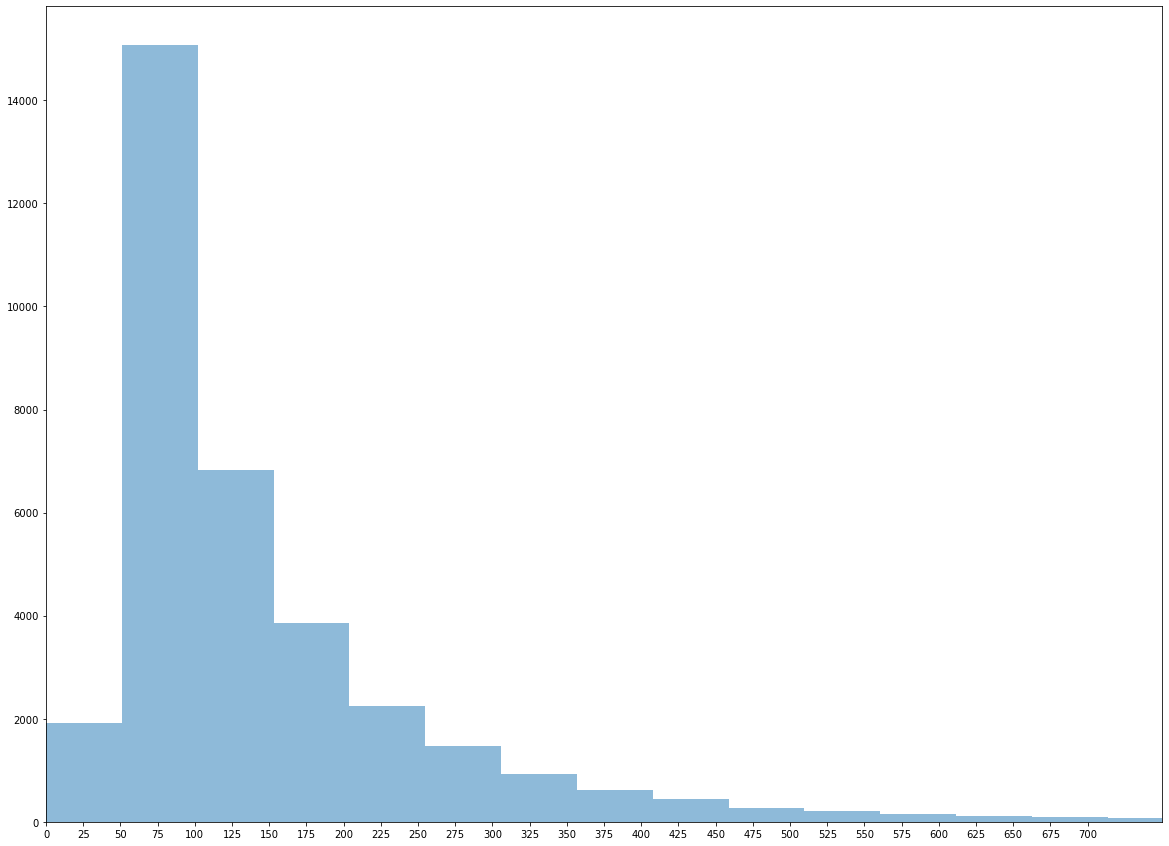

In [25]:
#bins = np.arange(0, 2000, 100 )
plt.figure(figsize = (20, 15))
ax1 = df.loc[df['reviews.rating'].isin([1, 2, 3, 4 ,5]), "length_review"].hist(bins=200, alpha = 0.5, label='Rating=1', grid = False) 
plt.xticks(np.arange(0, 701, step = 25))
#plt.yticks(np.arange(0, 5000, step = 100))
plt.xlim(0, 750)

In [26]:
df_new1 = random_select( df, 5000, np.arange(50, 100), 'length_review' ) 
df_new2 = random_select( df, 5000, np.arange(100, 150), 'length_review' ) 
df_new3 = df[df['length_review'] > 150]
df_new4 = df[df['length_review'] < 50 ]
df_new = pd.concat( [df_new1, df_new2, df_new3, df_new4 ], ignore_index = True )

(0.0, 750.0)

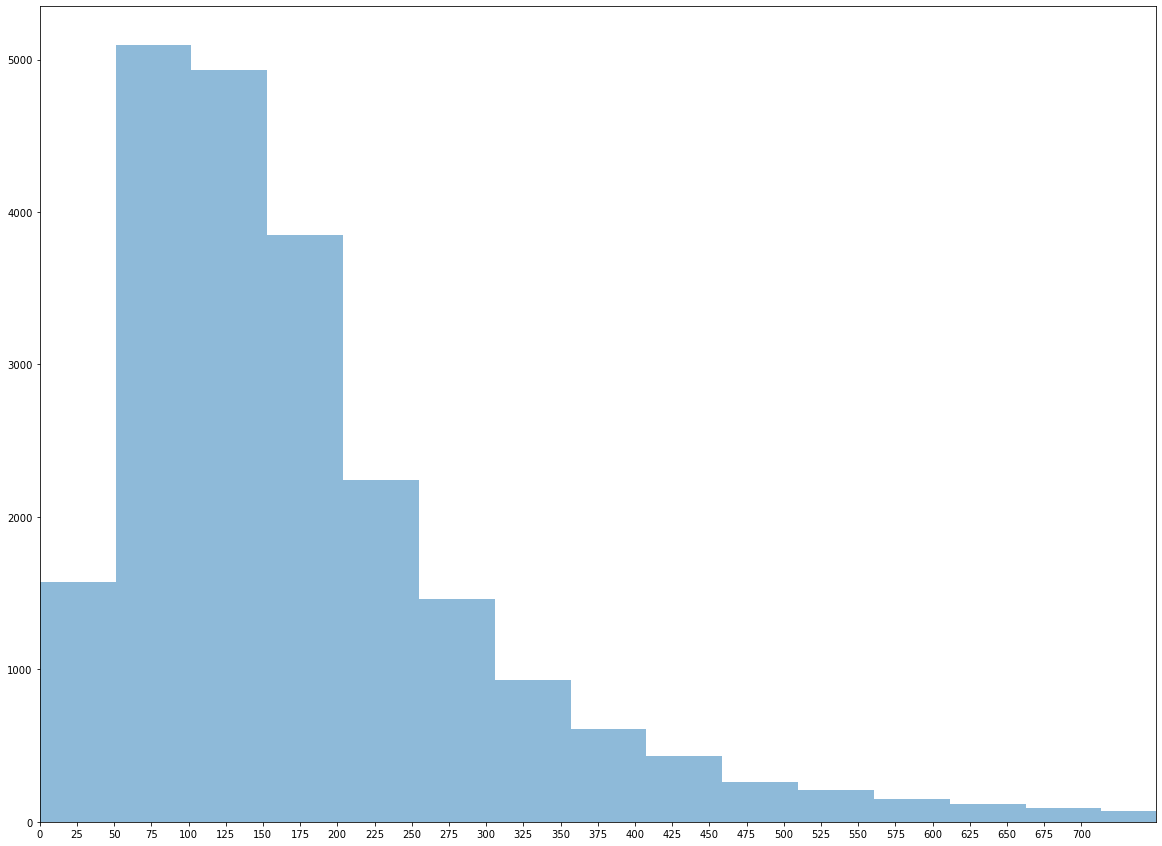

In [27]:
plt.figure(figsize = (20, 15))
ax1 = df_new.loc[df_new['reviews.rating'].isin([1, 2, 3, 4 ,5]), "length_review"].hist(bins=200, alpha = 0.5, label='Rating=1', grid = False) 
plt.xticks(np.arange(0, 701, step = 25))
#plt.yticks(np.arange(0, 5000, step = 100))
plt.xlim(0, 750)

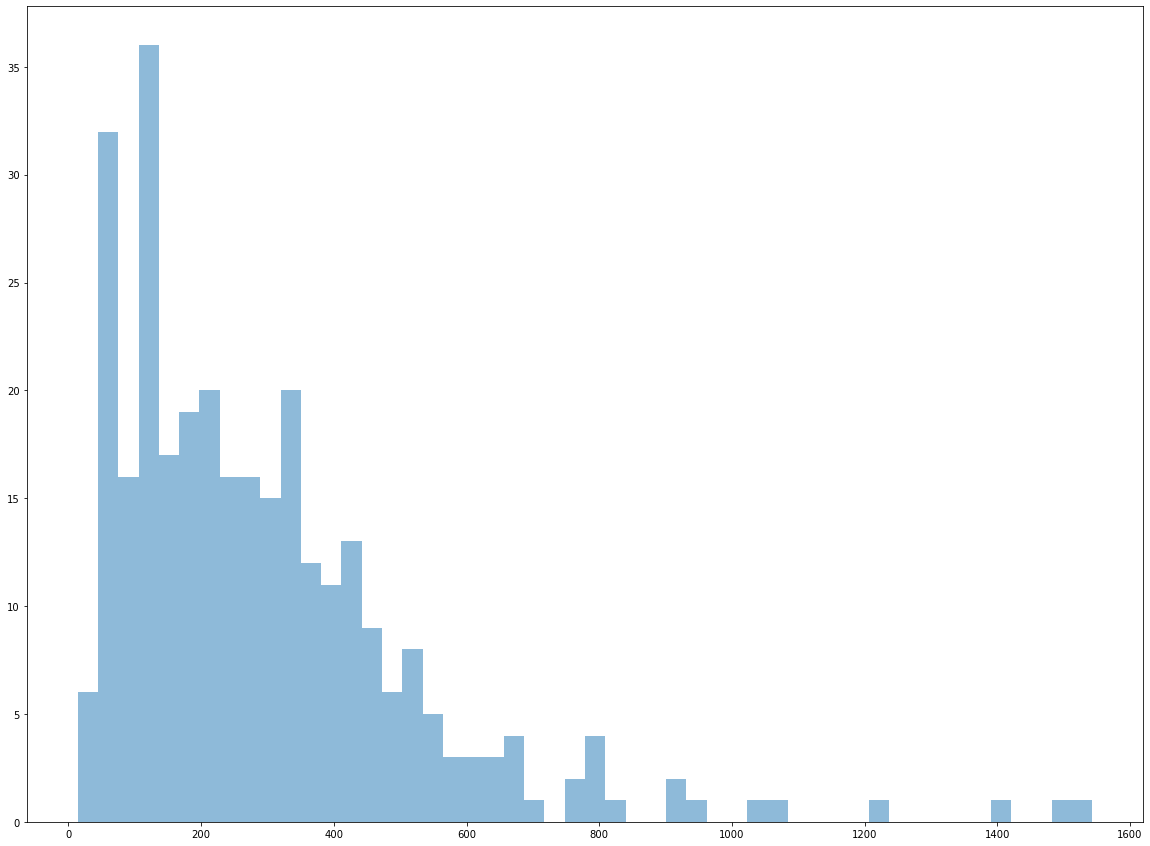

In [28]:
ax2 = df_new.loc[df_new['reviews.rating'] == 1, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

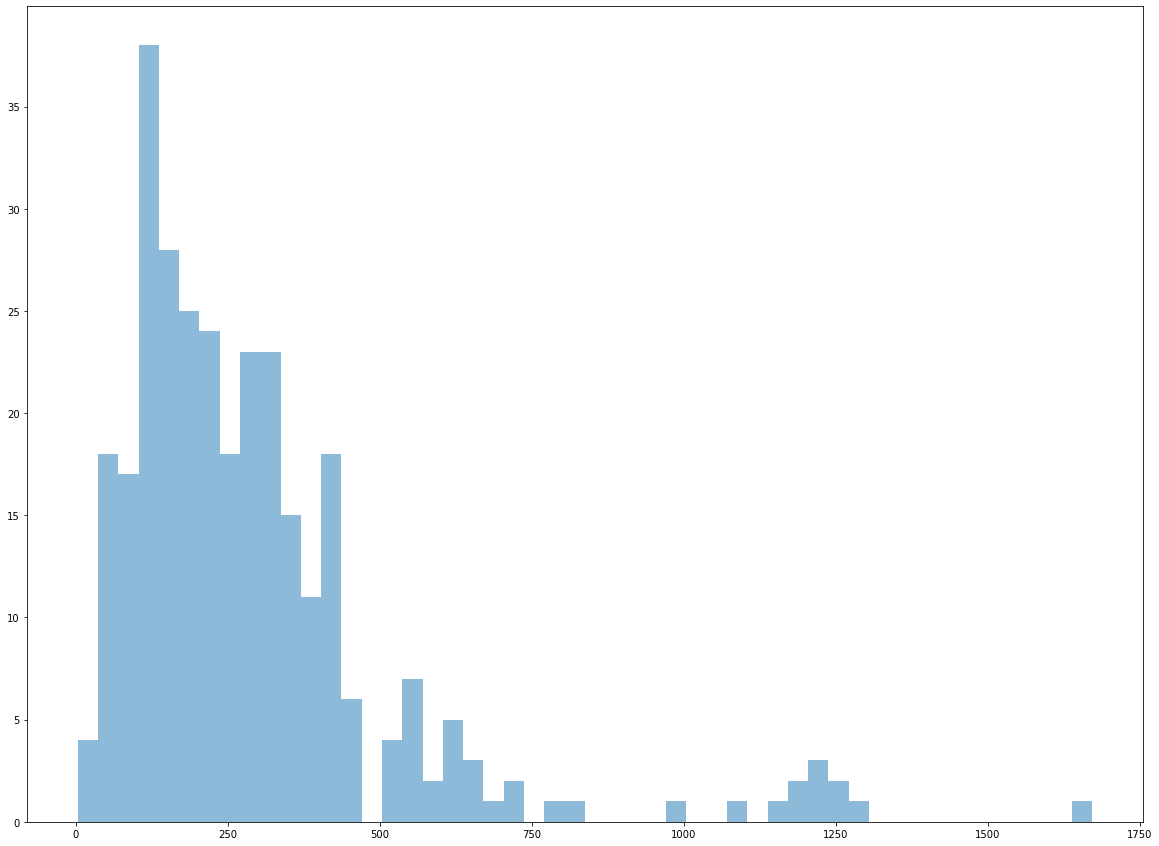

In [29]:
ax3 = df_new.loc[df_new['reviews.rating'] == 2, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

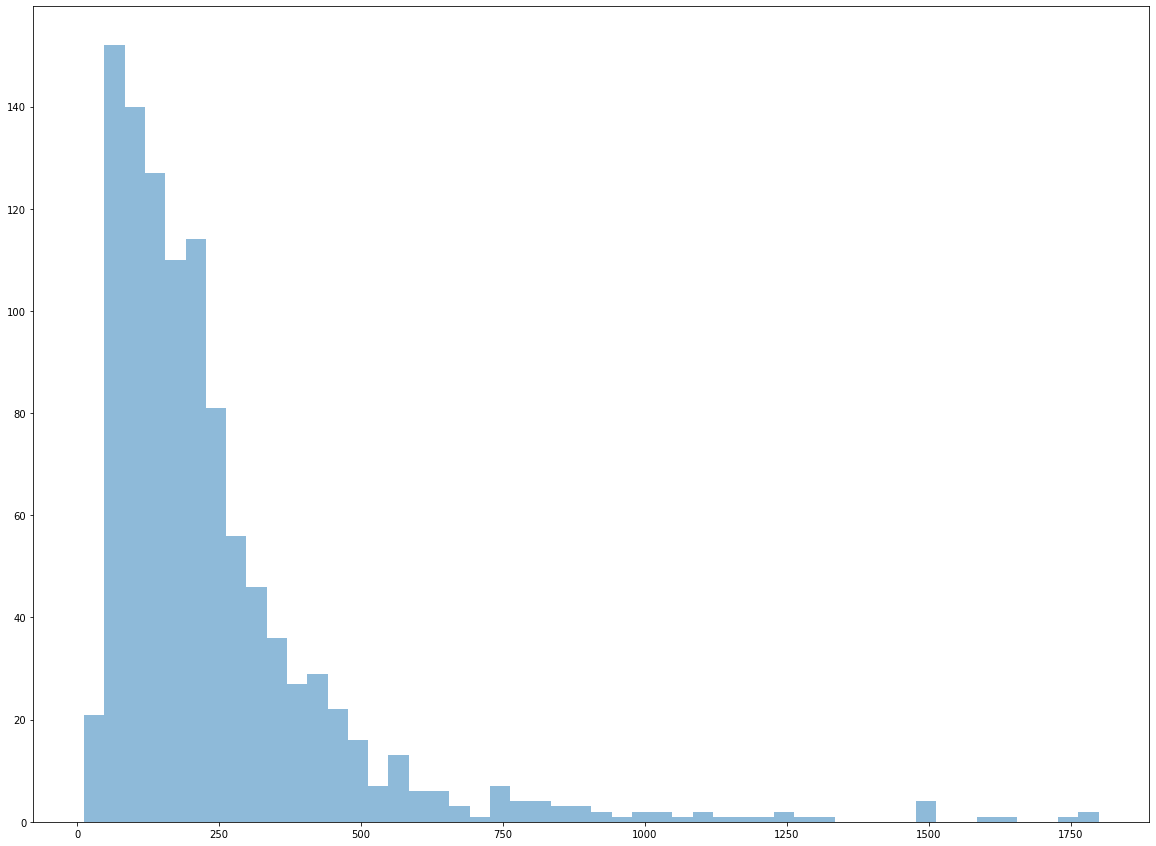

In [30]:
ax4 = df_new.loc[df_new['reviews.rating'] == 3, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

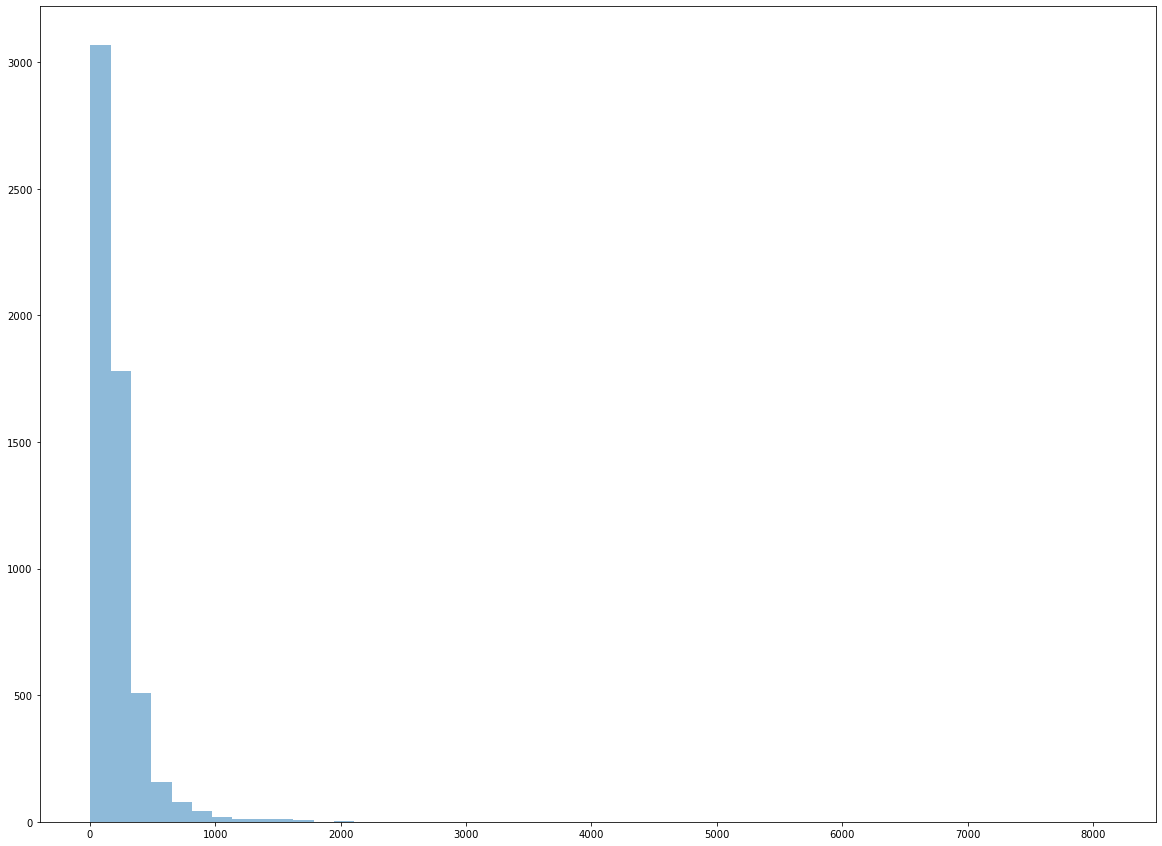

In [31]:
ax5 = df_new.loc[df_new['reviews.rating'] == 4, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

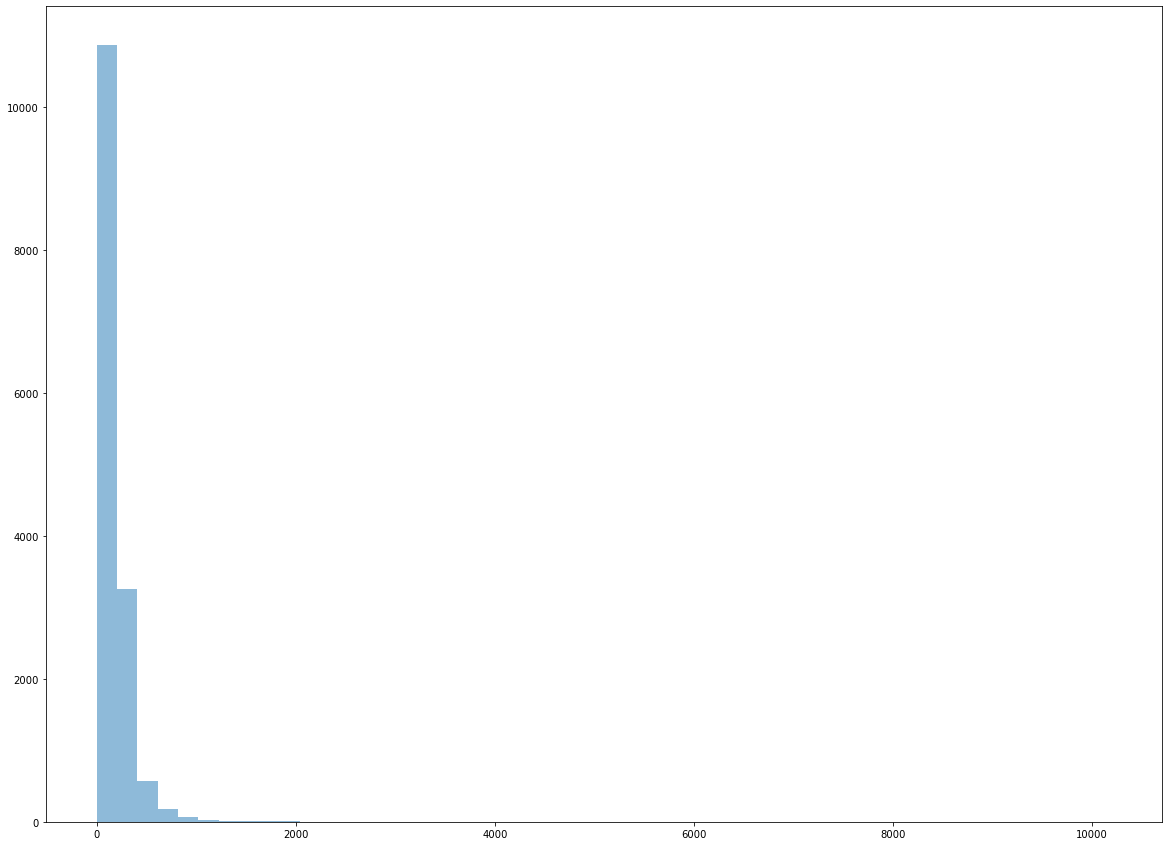

In [32]:
ax6 = df_new.loc[df_new['reviews.rating'] == 5, "length_review"].hist(bins=50, figsize=(20, 15), alpha = 0.5, grid = False ) 

In [33]:
count = (df_new['length_review'] > 2000).sum()
count

23

In [34]:
df_new = df_new.drop( columns = [ 'id', 'name', 'keys', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs' ] )

In [35]:
df_new = df_new.drop( columns = [ 'reviews.dateAdded', 'reviews.username' ] )
df_new

,asins,brand,categories,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,length_review,length_title
0,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,True,0.0,5.0,ok i did like the product very much thank you ...,okkkkkk,52,7
1,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,True,0.0,5.0,Love this unit Helps me stay ahead of the game...,Works Well,70,10
2,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...",Amazon,True,0.0,5.0,This is the third Kindle I have purchased two...,Kindle,93,6
3,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,True,0.0,5.0,Great device for an extra set up in the house ...,Fantastic,80,9
4,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",Amazon,True,0.0,5.0,I love asking Alexa questions and having her t...,Its great,71,9
...,...,...,...,...,...,...,...,...,...,...,...
22441,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,0.0,5.0,One of the best TV boxes on the market hands down,One of the best TV boxes on the market,49,38
22442,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,0.0,5.0,Works great for all your online streaming needs,Excellent,48,9
22443,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,1.0,5.0,Great,great,5,5
22444,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...",Amazon,True,0.0,5.0,its a great product to stream all your favorites,Great Product,48,13


Now, we observe that the columns we will work with are id (or name, they are correlated) and reviews.text. We will create a new database with these two and add a column based on the reviews.rating :

- 5 : good (2)
- 3, 4 : neutral (1)
- 1, 2 : bad

In [36]:
def random_select(df, n, rating, column): #choose the database and the number of samples with the indicated rating (specify the 
                                            # name of the column)
    rating_df = df[df[column] == rating]
    dff = rating_df.sample(n=n, random_state=42) 

    return dff

df3 = random_select(df_new, 1000, 3, 'reviews.rating')
df4 = random_select(df_new, 1000, 4, 'reviews.rating')
df5 = random_select(df_new, 1500, 5, 'reviews.rating')

In [37]:
df3.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,981.000000,1000.0,1000.000000,1000.000000
mean,1.690112,3.0,244.754000,20.492000
std,25.532168,0.0,229.494063,11.691819
min,0.000000,3.0,18.000000,2.000000
25%,0.000000,3.0,109.000000,12.000000
50%,0.000000,3.0,186.000000,19.000000
75%,0.000000,3.0,295.000000,27.000000
max,730.000000,3.0,1799.000000,119.000000


In [38]:
df4.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,990.000000,1000.0,1000.000000,1000.000000
mean,0.948485,4.0,203.575000,20.838000
std,12.152901,0.0,184.195837,10.019089
min,0.000000,4.0,6.000000,3.000000
25%,0.000000,4.0,87.750000,13.000000
50%,0.000000,4.0,152.000000,19.000000
75%,0.000000,4.0,254.000000,27.000000
max,271.000000,4.0,1966.000000,50.000000


In [39]:
df5.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,1477.000000,1500.0,1500.000000,1500.000000
mean,0.367637,5.0,180.382000,19.086667
std,2.991788,0.0,174.608798,11.189100
min,0.000000,5.0,4.000000,3.000000
25%,0.000000,5.0,83.000000,12.000000
50%,0.000000,5.0,137.000000,17.000000
75%,0.000000,5.0,215.000000,25.000000
max,63.000000,5.0,2567.000000,191.000000


In [42]:
df12 = df_new[df_new['reviews.rating'].isin([1, 2])]

In [43]:
df12.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,575.000000,613.000000,613.000000,613.000000
mean,6.205217,1.499184,295.672104,21.946166
std,32.686180,0.500408,241.109605,13.357651
min,0.000000,1.000000,3.000000,2.000000
25%,0.000000,1.000000,131.000000,12.000000
50%,0.000000,1.000000,240.000000,20.000000
75%,1.000000,2.000000,375.000000,30.000000
max,422.000000,2.000000,1672.000000,109.000000


In [44]:
amazon = pd.concat([df12, df3, df4, df5], ignore_index=True)
amazon.describe()

,reviews.numHelpful,reviews.rating,length_review,length_title
count,4023.000000,4113.000000,4113.000000,4113.000000
mean,1.667412,3.748845,218.854607,20.280331
std,18.831049,1.230644,206.019892,11.437359
min,0.000000,1.000000,3.000000,2.000000
25%,0.000000,3.000000,99.000000,12.000000
50%,0.000000,4.000000,161.000000,18.000000
75%,0.000000,5.000000,269.000000,26.000000
max,730.000000,5.000000,2567.000000,191.000000


In [45]:
def label(r):
    if r >= 4.0:
        return 1
    return 0

amazon['label'] = amazon['reviews.rating'].apply(label)


In [47]:
amazon = amazon[[ 'reviews.text', 'reviews.rating', 'length_review', 'label']]
amazon.describe()

,reviews.rating,length_review,label
count,4113.000000,4113.000000,4113.000000
mean,3.748845,218.854607,0.607829
std,1.230644,206.019892,0.488294
min,1.000000,3.000000,0.000000
25%,3.000000,99.000000,0.000000
50%,4.000000,161.000000,1.000000
75%,5.000000,269.000000,1.000000
max,5.000000,2567.000000,1.000000


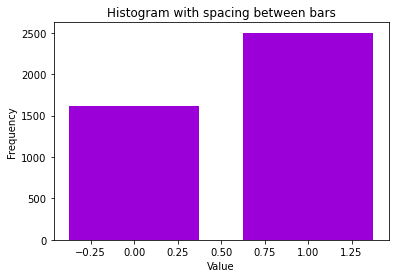

In [48]:
data = amazon['label']
min_bin = - 0.5
max_bin = 1.5
bins = np.arange(min_bin, max_bin + 1, 1)  

counts, edges = np.histogram(data, bins=bins)

bar_width = 0.75

for left, height in zip(edges[:-1], counts):
    plt.bar(left + 0.5 * (1 - bar_width), height, width=bar_width, align='edge', color='#9b00d9')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with spacing between bars')
plt.show()

In [52]:
good = amazon[amazon['label'] == 1]
bad = amazon[amazon['label'] == 0]

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
goods = good['reviews.text'].tolist()
goods = [str(x) for x in goods]

g = []
for s in goods:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    g.append(s)
goods = g
goods

['Echo sounds better for music but Tap gives me portability Good to have both Now Tap is voice activated so its all good',
 'Its just enough for my 3 yr old Enough storage space Easy to navigate through',
 'Our household is an Apple household 3 iPads 4 iPhones Mac Apple TV etc but for the price of these tablets I gave this a try I had low expectations due to the price point and didnt expect much as far as screen resolution etcSet up was easy linked with my Amazon Prime account easily as wellscreen resolution doesnt compare to iPad Retina display but thats expectedbattery life is ok but not on par with iPadI use it for Ebooks as its smaller than my iPads and for checking Facebook etc if its nearbyIt cant replace iPad BUTI bought 4 of them so everyone in my house has this small functional tabletMight even permanently mount as small TV screens in bathroom etc',
 'Its a very nice product to purchase They give you 1 year of free stuff from amazon You can download all kinds of apps Great tab

In [60]:
bads = bad['reviews.text'].tolist()
bads = [str(x) for x in bads]

b = []
for s in bads:
    sentence = [c for c in s if c not in string.punctuation]
    s = ''.join(sentence)
    b.append(s)
bads = b
bads

['If you actually paid 20 for this adapter youre out of your mind',
 'Screen was cracked but the package did arrive earlier than expected',
 'Cumbersome complicated and not kid friendly went with Apple suggesting you do too',
 'Bad performance Slow device Not worth buying Better products are available in this range',
 'go for a google if you want proper answers to any of your questions',
 'I thought Id love this but felt like it had very little purpose Did like it at all',
 'Returned it in 2 days Digital assistants have a long way to go',
 'Sadly no having netflix support is resulting in my last tablet purchase from Amazon',
 'Dont like the fact you have to have Amazon prime to use it',
 'Super Slow Would not download Returned after a week',
 'It was ancient technology and did not keep up with the internet',
 'I returned the item was not what I expected very disappointed white the table',
 'I didont care for this tablet downloading apps outside of Amazon was really confusing',
 'Sold i

In [61]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
g = []
for s in goods:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    g.append(s)

goods = g

In [63]:
b = []
for s in bads:
    sentence = [word for word in s.split() if word not in stopwords.words('english')]
    s = ' '.join(sentence)
    b.append(s)

bads = b

In [64]:
def data_cleaning(text):

    Test_punc_removed = [char for char in text if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean    

In [65]:
y = amazon['label']

In [72]:
X = pd.DataFrame( amazon['length_review'].values )

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [103]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

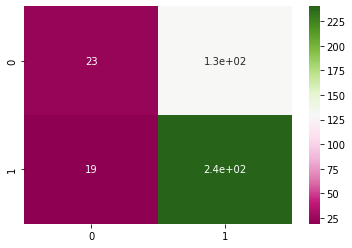

In [105]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap="PiYG")

In [97]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.57      0.14      0.22       148
           1       0.66      0.94      0.78       264

    accuracy                           0.65       412
   macro avg       0.62      0.54      0.50       412
weighted avg       0.63      0.65      0.58       412



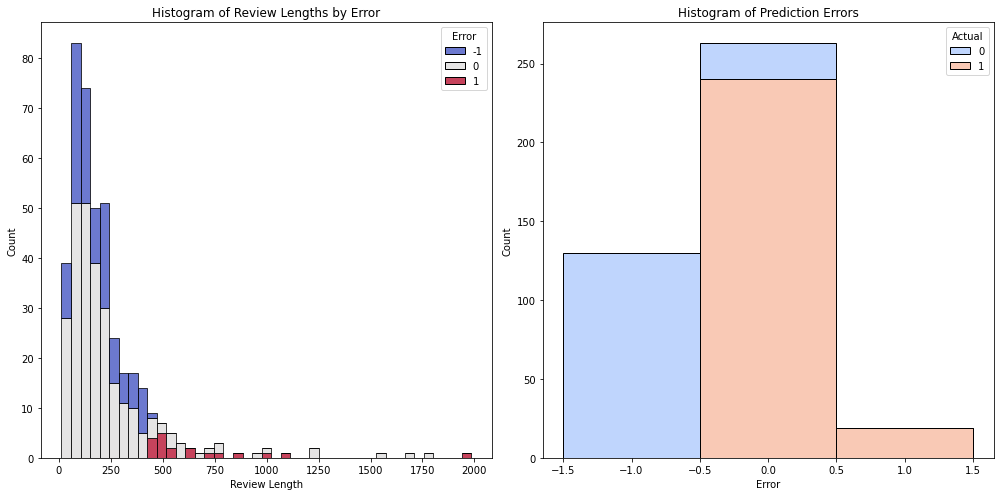

Correlation between Review Length and Error:
               Review_Length    Error
Review_Length        1.00000  0.28455
Error                0.28455  1.00000


In [125]:
errors = y_test - y_predict_test
results = pd.DataFrame({
    'Review_Length': X_test.values.ravel(),
    'Actual': y_test,
    'Predicted': y_predict_test,
    'Error': errors
})

# Plot histograms
plt.figure(figsize=(14, 7))

# Histogram of review lengths with errors
plt.subplot(1, 2, 1)
sns.histplot(data=results, x='Review_Length', hue='Error', multiple='stack', palette='coolwarm')
plt.title('Histogram of Review Lengths by Error')
plt.xlabel('Review Length')
plt.ylabel('Count')

# Histogram of prediction errors
#results['Actual'] = results['Actual'].astype('category')
plt.subplot(1, 2, 2)
sns.histplot(data=results, x='Error', hue='Actual', multiple='stack', palette='coolwarm', bins = np.arange( -1.5, 2.5, 1))
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation between review length and error
correlation = results[['Review_Length', 'Error']].corr()
print("Correlation between Review Length and Error:")
print(correlation)

              precision    recall  f1-score   support

           0       0.65      0.08      0.14       249
           1       0.61      0.97      0.75       368

    accuracy                           0.61       617
   macro avg       0.63      0.53      0.45       617
weighted avg       0.62      0.61      0.50       617



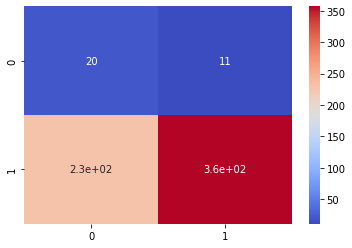

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap="coolwarm")

print(classification_report(y_test, y_pred))